### Documentación

Problemas interesantes para Aprendizaje por refuerzo
 * Gymnasium: https://gymnasium.farama.org/environments/box2d/

## Instalación

!pip install gymnasium  
!pip install gymnasium[box2d] 

## Acciones adicionales

### En macos

pip uninstall swig  
xcode-select -—install (si no se tienen ya)  
pip install swig  / sudo port install swig-python
pip install 'gymnasium[box2d]' # en zsh hay que poner las comillas  

### en Windows

Si da error, se debe a la falta de la versión correcta de Microsoft Visual C++ Build Tools, que es una dependencia de Box2D. Para solucionar este problema, puede seguir los siguientes pasos:  
 * Descargar Microsoft Visual C++ Build Tools desde https://visualstudio.microsoft.com/visual-cpp-build-tools/.
 * Dentro de la app, seleccione la opción "Herramientas de compilación de C++" para instalar.
 * Reinicie su sesión en Jupyter Notebook.
 * Ejecute nuevamente el comando !pip install gymnasium[box2d] en la línea de comandos de su notebook.

In [1]:
import gymnasium as gym
import numpy as np
import matplotlib.pyplot as plt
import gymnasium.utils.play
import pygame
import time

from AGLunarLander import AG_Lunar_Lander

%matplotlib inline

## **Human play**

In [13]:
# prueba lunar lander por humano
env = gym.make("LunarLander-v3", render_mode="rgb_array")

lunar_lander_keys = {
    (pygame.K_UP,): 2,
    (pygame.K_LEFT,): 1,
    (pygame.K_RIGHT,): 3,
}
gymnasium.utils.play.play(env, zoom=1.5, keys_to_action=lunar_lander_keys, noop=0)

## **Auto-play**

In [14]:
env = gym.make("LunarLander-v3", render_mode="human")
env_seed = 42
observation, info = env.reset(seed=env_seed)
for _ in range(1000):
    action = env.action_space.sample()
    observation, reward, terminated, truncated, info = env.step(action)
    if terminated or truncated:
        observation, info = env.reset()
env.close()

----

## **Agent play**

In [2]:
env = gym.make("LunarLander-v3")
genetic_algorithm = AG_Lunar_Lander(population_size=100, num_ind_exp=5, env=env, env_seed=None)

print("model params:", genetic_algorithm.MLP.size)

start = time.time()
genetic_algorithm.evolve(pmut=0.1, pcross=0.7, ngen=50, T=6, trace=10, reverse_sort=True, elitism=False)
minutos, segundos = divmod(time.time()-start, 60)
print(f"*******Tiempo evolución: {int(minutos)} minutos y {segundos:.2f} segundos*******")

model params: 82
Nº gen: 0, Best fitness: -80.63953010854569
Nº gen: 10, Best fitness: -78.99121494575641
Nº gen: 20, Best fitness: -85.28940331502618
Nº gen: 30, Best fitness: -66.95743244368006
Nº gen: 40, Best fitness: -87.92567579662692
Nº gen: 49, Best fitness: -81.01441964682533
*******Tiempo evolución: 0 minutos y 44.00 segundos*******


## **Fitnesses evolution**

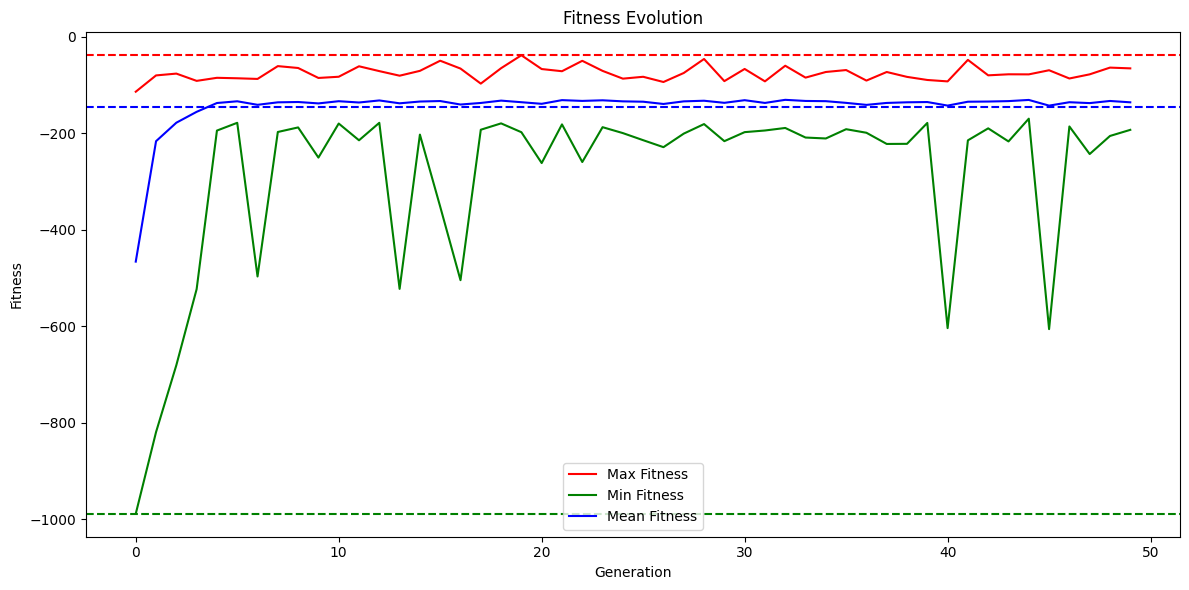

In [7]:
def plot_fitnesses_evolution():
    plt.figure(figsize=(12, 6))
    
    max_fitness = genetic_algorithm.max_fitnesses
    min_fitness = genetic_algorithm.min_fitnesses
    mean_fitness = genetic_algorithm.mean_fitnesses
    
    plt.plot(max_fitness, label='Max Fitness', color='r')
    plt.axhline(y=max(max_fitness), color='r', linestyle='--')
    
    plt.plot(min_fitness, label='Min Fitness', color='g')
    plt.axhline(y=min(min_fitness), color='g', linestyle='--')
    
    plt.plot(mean_fitness, label='Mean Fitness', color='b')
    plt.axhline(y=np.mean(mean_fitness), color='b', linestyle='--')
    
    plt.xlabel('Generation')
    plt.ylabel('Fitness')
    plt.title('Fitness Evolution')
    plt.legend(loc='lower center')
    plt.tight_layout()
    plt.savefig("images/lunar-lander-evolution.png")
    plt.show()

plot_fitnesses_evolution()

## **Test best chromosome**

In [ ]:
from MLP import MLP

chromosome = genetic_algorithm.best_global_individual[1] # chromosome is second element of tuple
model = MLP([8,6,4]) # must be same as genetic_algorithm.MLP
model.from_chromosome(chromosome)

def policy(observation):
    s = model.forward(observation)
    action = np.argmax(s)
    return action

env = gym.make("LunarLander-v3", render_mode="human")

def run():
    observation, info = env.reset()
    racum = 0
    while True:
        action = policy(observation)
        observation, reward, terminated, truncated, info = env.step(action)
        
        racum += reward

        if terminated or truncated:
            r = (racum+200) / 500
            # print("racum:", racum)
            # print("reward:", r)
            return racum
        
while True:
    run()

## **¿No has tenido bastante?**

Prueba a controlar el flappy bird https://github.com/markub3327/flappy-bird-gymnasium

pip install flappy-bird-gymnasium

import flappy_bird_gymnasium  
env = gym.make("FlappyBird-v0")

Estado (12 variables):
  * the last pipe's horizontal position
  * the last top pipe's vertical position
  * the last bottom pipe's vertical position
  * the next pipe's horizontal position
  * the next top pipe's vertical position
  * he next bottom pipe's vertical position
  * the next next pipe's horizontal position
  * the next next top pipe's vertical position
  * the next next bottom pipe's vertical position
  * player's vertical position
  * player's vertical velocity
  * player's rotation

  Acciones:
  * 0 -> no hacer nada
  * 1 -> volar